# EX2.4


Design and train a neural network to approximate the following function:

```
y = x1^2 + x^2
```

where x1 and x2 are scalar inputs, and y is the output.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from types import SimpleNamespace
%matplotlib inline

In [2]:
### A) Create data sets

In [3]:
### A.1) Create a training dataset
X1 = np.arange(-22, 23, 2) 
X2 = np.arange(-10, 11, 1) 
X1, X2 = np.meshgrid(X1, X2)
y = X1**2 + X2**2
print(X1.size, X2.size)
# print(np.concatenate(X1,X2))

483 483


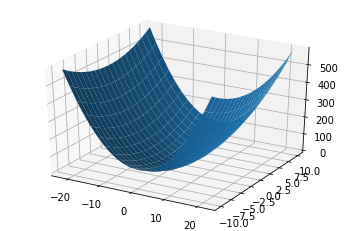

In [4]:
# Plot the training set

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
from matplotlib import cm 
from matplotlib.ticker import LinearLocator, FormatStrFormatter 
import numpy as np 
%matplotlib inline

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data. 
# X = np.arange(-5, 5, 0.25) 
# Y = np.arange (-5, 5, 0.25) 
# X, Y = np.meshgrid(X, Y) 
# R = np.sqrt(X**2 + Y**2) 
# Z = np.sin(R)

# Plot the surface. 
surf = ax.plot_surface(X1, X2, y) 
plt.show()


In [5]:
### A.2) Create the first testing dataset (Test1)
Test1X1 = np.arange(-22, 22, 0.88) 
Test1X2 = np.arange(-10, 10, 0.4) 
Test1X1, Test1X2 = np.meshgrid(Test1X1, Test1X2)
Test1y = Test1X1**2 + Test1X2**2

In [6]:
### A.3) Create the second testing dataset (Test2)
Test2X1 = np.arange(-50, 50, 2) 
Test2X2 = np.arange(-30, 30, 1.2) 
Test2X1, Test2X2 = np.meshgrid(Test2X1, Test2X2)
Test2y = Test2X1**2 + Test2X2**2

In [7]:
# Normalize data
def normalize(train, test1, test2):
    train_bar = np.reshape(train, [-1, 1])
    std_data= np.std(train_bar, 0)
    mean_data= np.mean(train_bar, 0)

    train = (train-mean_data)/std_data
    test1 = (test1-mean_data)/std_data
    test2 = (test2-mean_data)/std_data
    return train, test1, test2, std_data, mean_data

# Method to denormalize data (for plotting)
def denormalize(data, std_data, mean_data):
    return (data * std_data) + mean_data

X1, Test1X1, Test2X1, stdX1, meanX1 = normalize(X1, Test1X1, Test2X1)
X2, Test1X2, Test2X2, stdX2, meanX2 = normalize(X2, Test1X2, Test2X2)
y,  Test1y,  Test2y,  stdy,  meany  =  normalize(y,  Test1y,  Test2y)

In [24]:
### B) Train a neural network using TensorFlow.
def train(hidden_layer_activation_function):
    input_size = 2
    n_hidden = 25
    n_outputs = 1

    sess = tf.InteractiveSession()
    w1 = tf.Variable(
        tf.truncated_normal(
            shape=[input_size, n_hidden],
            stddev=0.1), 
        name= 'w1')
    b1 = tf.Variable(
        tf.truncated_normal(
            shape=[n_hidden], 
            stddev=0.1), 
        name= 'b1') # TODO

    w2 = tf.Variable(
        tf.truncated_normal(
            shape=[n_hidden, n_outputs],  # TODO
            stddev=0.1), 
        name= 'w2') # TODO
    b2 = tf.Variable(
        tf.truncated_normal(
            shape=[n_outputs], 
            stddev=0.1), 
        name= 'b2')

    # Define train setup
    inputs = tf.placeholder(tf.float32, [None, input_size])
    labels = tf.placeholder(tf.float32, [None, n_outputs])

    # h1 = tf.nn.sigmoid(tf.matmul(inputs, w1) + b1)
    h1 = hidden_layer_activation_function(tf.matmul(inputs, w1) + b1)

    # Output layer.
    yp = tf.matmul(h1, w2) + b2

    # Optimizer.
    loss = tf.reduce_mean((yp - labels)**2)
    optimizer = tf.train.AdamOptimizer(1e-3).minimize(loss) 


    def error(predictions, labels):
            return np.sum((predictions - labels)**2)/ predictions.shape[0]


    num_steps = 10000
    summary_freq = 1000
    n_test_logg = 10 # number of evaluations on test dataset (for logging information)

    tf.global_variables_initializer().run()
    print('Initialized')

    # lists for plotting
    l_epoch = []
    l_train_error = []
    l_test1_error = []
    l_test2_error = []

    mean_loss= 0
    train_error = 0
    # Perform num_steps training steps
    for step in range(num_steps):
        #     batch_X, batch_y= np.concatenate((np.reshape(X1, [-1,1]), np.reshape(X2, [-1,1])), axis=1), y
        batch_X, batch_y= np.concatenate((np.reshape(X1, [-1,1]), np.reshape(X2, [-1,1])), axis=1), np.reshape(y, [-1,1])
        # Construct Feed dictionary that consist of the input data 
        # that is going to be feed into the computation graph
        feed_dict = {inputs : batch_X, labels : batch_y}
        # Call the optimizer to perform one step of the training
        _, l, train_pred = sess.run([optimizer, loss, yp],feed_dict=feed_dict)

        train_error += error(train_pred, batch_y)
        mean_loss += l    
    #     print(train_pred[0])
        if step%summary_freq == 0:
            # Obtain train error
            train_error = train_error/summary_freq
            # Evaluate error on test dataset
            test_error1 = 0
            test_error2 = 0
            for i in range(n_test_logg):
                # Test1
                batch_X_test, batch_y_test = np.concatenate((np.reshape(Test1X1, [-1,1]), np.reshape(Test1X2, [-1,1])), axis=1), np.reshape(Test1y, [-1,1])
                pred = yp.eval(feed_dict={inputs: batch_X_test})
                test_error1 += error(pred, batch_y_test)

                # Test2
                batch_X_test, batch_y_test = np.concatenate((np.reshape(Test2X1, [-1,1]), np.reshape(Test2X2, [-1,1])), axis=1), np.reshape(Test2y, [-1,1])
                pred = yp.eval(feed_dict={inputs: batch_X_test})
                test_error2 += error(pred, batch_y_test)
            test_error1= test_error1/n_test_logg
            test_error2=test_error2/n_test_logg

            l_epoch.append(step)
            l_train_error.append(train_error)
            l_test1_error.append(test_error1)
            l_test2_error.append(test_error2)

            print(step, ', train:',train_error,' | test1:', test_error1, ' | test2:', test_error2, ' | loss:', mean_loss/summary_freq)
            mean_loss= 0
            train_error= 0
            
    # Plot each type:
    plot(X1, X2, y, yp, inputs)
    plot(Test1X1, Test1X2, Test1y, yp, inputs)
    plot(Test2X1, Test2X2, Test2y, yp, inputs)
            
def plot(X1, X2, y, yp, inputs, show_real_values=False):
    # Plot outputs for Test2
    batch_X_test, batch_y_test= np.concatenate((np.reshape(X1, [-1,1]), np.reshape(X2, [-1,1])), axis=1), np.reshape(y, [-1,1])
    pred = yp.eval(feed_dict={inputs: batch_X_test})

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Plot the surface. 
    X_surf = denormalize(X1, stdX1, meanX1) 
    Z_surf = denormalize(X2, stdX2, meanX2) 
    Y_surf_pred = denormalize(np.reshape(pred, y.shape), stdy, meany)
    Y_surf_real = denormalize(y, stdy, meany)
    surf1 = ax.plot_surface(X_surf, Z_surf, Y_surf_pred, label="Prediction")

    if show_real_values:
        surf2 = ax.plot_surface(X_surf, Z_surf, Y_surf_real, label="Real Value")

        # Some strange bug
        surf1._facecolors2d=surf._facecolors3d
        surf1._edgecolors2d=surf._edgecolors3d
        surf2._facecolors2d=surf._facecolors3d
        surf2._edgecolors2d=surf._edgecolors3d
        # End bug code

        plt.legend()
    plt.show()

Initialized
0 , train: 0.001027779970236812  | test1: 0.9179990525173304  | test2: 55.81523208121912  | loss: 0.0010277799367904663
1000 , train: 0.6215685881550608  | test1: 0.05194628799609742  | test2: 35.03177570343362  | loss: 0.6215685824379324
2000 , train: 0.0346280830713301  | test1: 0.011438119184032609  | test2: 26.93998011780706  | loss: 0.03462808137945831
3000 , train: 0.010171520929477486  | test1: 0.005203761236287804  | test2: 21.83111512495668  | loss: 0.010171520015690477
4000 , train: 0.004852123024532857  | test1: 0.002568584153423331  | test2: 17.869336994311876  | loss: 0.004852122405776754
5000 , train: 0.002310753893298269  | test1: 0.0010851916761281046  | test2: 14.852332212091152  | loss: 0.0023107534772716463
6000 , train: 0.0006948579526592774  | test1: 0.00019976463212808025  | test2: 12.801150904584542  | loss: 0.00069485773917404
7000 , train: 0.00019102846966235302  | test1: 0.00010795195734922662  | test2: 11.799033319192556  | loss: 0.000191028386485

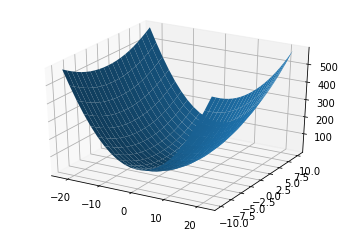

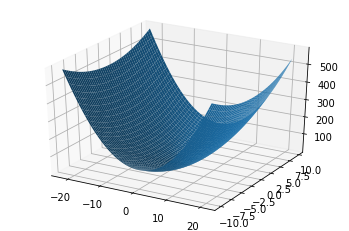

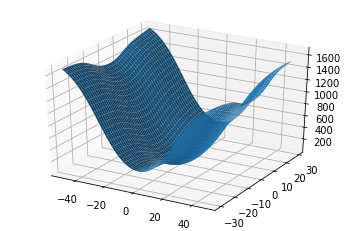

In [25]:
### B.1) Using Sigmoid
train(hidden_layer_activation_function=tf.nn.sigmoid)

Initialized
0 , train: 0.0010036333566299485  | test1: 0.8906328913266803  | test2: 55.15592308357465  | loss: 0.0010036333799362182
1000 , train: 0.1926952033170578  | test1: 0.004670207109137148  | test2: 14.402131337063944  | loss: 0.19269520044419913
2000 , train: 0.0033775051832107494  | test1: 0.002168975968460544  | test2: 11.625298313336089  | loss: 0.00337750474200584
3000 , train: 0.0021472701290843545  | test1: 0.0017811507722260357  | test2: 10.53154802619522  | loss: 0.0021472698195138945
4000 , train: 0.001830346616950683  | test1: 0.0016338720887371875  | test2: 9.973412896605117  | loss: 0.0018303463832708075
5000 , train: 0.0017532707510407167  | test1: 0.001603549245067106  | test2: 9.666144772121315  | loss: 0.0017532705658813937
6000 , train: 0.0017316590350332122  | test1: 0.001593635838887606  | test2: 9.538394529640724  | loss: 0.0017316588767571374
7000 , train: 0.0016419337405034092  | test1: 0.0013368289170844797  | test2: 9.174911606356702  | loss: 0.00164193

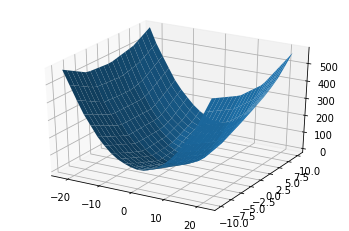

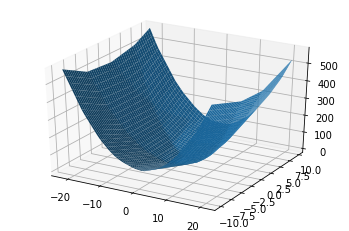

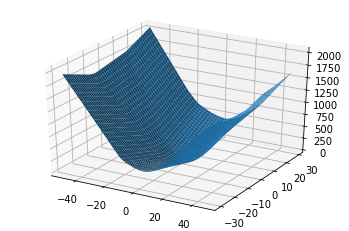

In [26]:
### B.2) Using ReLu
train(hidden_layer_activation_function=tf.nn.relu)